# Assignment 05

Author: Marcin Kaminski

In [1]:
# Imports

import pandas as pd # Data analysis library
import numpy as np # Numerical computing library
import matplotlib.pyplot as plt 


## Part 1

Write a jupyter notebook that analyses the differences between the sexes by age in Ireland.

- Weighted mean age (by sex)
- The difference between the sexes by age


In [2]:
url = "https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/FY006A/CSV/1.0/en" # URL of the CSV data
df = pd.read_csv(url) # Read CSV data from URL
df.head(5) # Display the first 5 rows of the DataFrame

,STATISTIC,Statistic Label,TLIST(A1),CensusYear,C02199V02655,Sex,C02076V03371,Single Year of Age,C03789V04537,Administrative Counties,UNIT,VALUE
0,FY006AC01,Population,2022,2022,-,Both sexes,-,All ages,IE0,Ireland,Number,5149139
1,FY006AC01,Population,2022,2022,-,Both sexes,-,All ages,2ae19629-1492-13a3-e055-000000000001,Carlow County Council,Number,61968
2,FY006AC01,Population,2022,2022,-,Both sexes,-,All ages,2ae19629-1433-13a3-e055-000000000001,Dublin City Council,Number,592713
3,FY006AC01,Population,2022,2022,-,Both sexes,-,All ages,2ae19629-149f-13a3-e055-000000000001,Dún Laoghaire Rathdown County Council,Number,233860
4,FY006AC01,Population,2022,2022,-,Both sexes,-,All ages,2ae19629-14a0-13a3-e055-000000000001,Fingal County Council,Number,330506


In [3]:
df = df[df["Sex"] != "Both sexes"] # Filter out
df.head(5) # Display the first 5 rows of the filtered DataFrame

,STATISTIC,Statistic Label,TLIST(A1),CensusYear,C02199V02655,Sex,C02076V03371,Single Year of Age,C03789V04537,Administrative Counties,UNIT,VALUE
3264,FY006AC01,Population,2022,2022,1,Male,-,All ages,IE0,Ireland,Number,2544549
3265,FY006AC01,Population,2022,2022,1,Male,-,All ages,2ae19629-1492-13a3-e055-000000000001,Carlow County Council,Number,30822
3266,FY006AC01,Population,2022,2022,1,Male,-,All ages,2ae19629-1433-13a3-e055-000000000001,Dublin City Council,Number,291796
3267,FY006AC01,Population,2022,2022,1,Male,-,All ages,2ae19629-149f-13a3-e055-000000000001,Dún Laoghaire Rathdown County Council,Number,112032
3268,FY006AC01,Population,2022,2022,1,Male,-,All ages,2ae19629-14a0-13a3-e055-000000000001,Fingal County Council,Number,162532


In [4]:
headers = df.columns.tolist() # Get list of column
headers # Display column headers

['STATISTIC',
 'Statistic Label',
 'TLIST(A1)',
 'CensusYear',
 'C02199V02655',
 'Sex',
 'C02076V03371',
 'Single Year of Age',
 'C03789V04537',
 'Administrative Counties',
 'UNIT',
 'VALUE']

In [5]:
drop_col_list = ['STATISTIC', 'Statistic Label','TLIST(A1)','C02199V02655','C02076V03371','C03789V04537','UNIT'] # List of columns to drop
df.drop(columns=drop_col_list, inplace=True) # Drop specified columns

In [6]:
df = df[df["Single Year of Age"] != "All ages"].copy() # Remove 'All ages' rows


df['Single Year of Age'] = df['Single Year of Age'].astype(str) # Convert to string


df['Single Year of Age'] = df['Single Year of Age'].str.replace('Under 1 year', '0') # Replace 'Under 1 year' with '0'


df['Single Year of Age'] = df['Single Year of Age'].str.replace(r'\D', '', regex=True) # Remove non-digit characters


df['Single Year of Age'] = pd.to_numeric(df['Single Year of Age'], errors='coerce') # Convert to numeric, coercing errors to NaN
df['VALUE'] = pd.to_numeric(df['VALUE'], errors='coerce') 

df = df.dropna(subset=['Single Year of Age', 'VALUE']).copy() # Drop rows with NaN values in specified columns

df['Single Year of Age'] = df['Single Year of Age'].astype('int64') # Convert to int64
df['VALUE'] = df['VALUE'].astype('int64') 

print(df.head()) # Display the first 5 rows of the cleaned DataFrame


      CensusYear   Sex  Single Year of Age  \
3296        2022  Male                   0   
3297        2022  Male                   0   
3298        2022  Male                   0   
3299        2022  Male                   0   
3300        2022  Male                   0   

                    Administrative Counties  VALUE  
3296                                Ireland  29610  
3297                  Carlow County Council    346  
3298                    Dublin City Council   3188  
3299  Dún Laoghaire Rathdown County Council   1269  
3300                  Fingal County Council   2059  


In [7]:
df_analysis = pd.pivot_table(df, 'VALUE',"Single Year of Age","Sex") # Create pivot table for analysis
print (df_analysis.head(71)) # Display the first 71 rows of the pivot table

Sex                    Female       Male
Single Year of Age                      
0                   1761.6250  1850.6250
1                   1721.5625  1804.6875
2                   1810.8750  1889.7500
3                   1842.6875  1937.5625
4                   1863.6875  1980.3750
...                       ...        ...
66                  1541.3750  1484.9375
67                  1532.7500  1476.6875
68                  1438.6250  1406.3750
69                  1460.9375  1412.1250
70                  1368.5625  1328.3125

[71 rows x 2 columns]


In [8]:
df_analysis = pd.pivot_table(df, 'VALUE',"Single Year of Age","Sex") # Create pivot table for analysis
print (df_analysis.tail(30)) # Display the last 30 rows of the pivot table

Sex                    Female       Male
Single Year of Age                      
71                  1327.2500  1278.0625
72                  1322.4375  1247.8125
73                  1258.3750  1195.0625
74                  1198.5625  1155.8125
75                  1143.3750  1092.0625
76                  1104.0625  1005.8750
77                   998.1875   912.5625
78                   916.6250   837.0000
79                   871.1250   760.3750
80                   760.8125   667.1250
81                   699.4375   591.8750
82                   672.4375   548.6875
83                   624.0625   493.7500
84                   555.6250   422.8125
85                   518.9375   384.6250
86                   468.8125   335.6250
87                   422.8750   282.1875
88                   370.4375   235.6875
89                   310.0625   189.7500
90                   267.8125   152.7500
91                   236.3125   121.8750
92                   175.5625    81.0625
93              

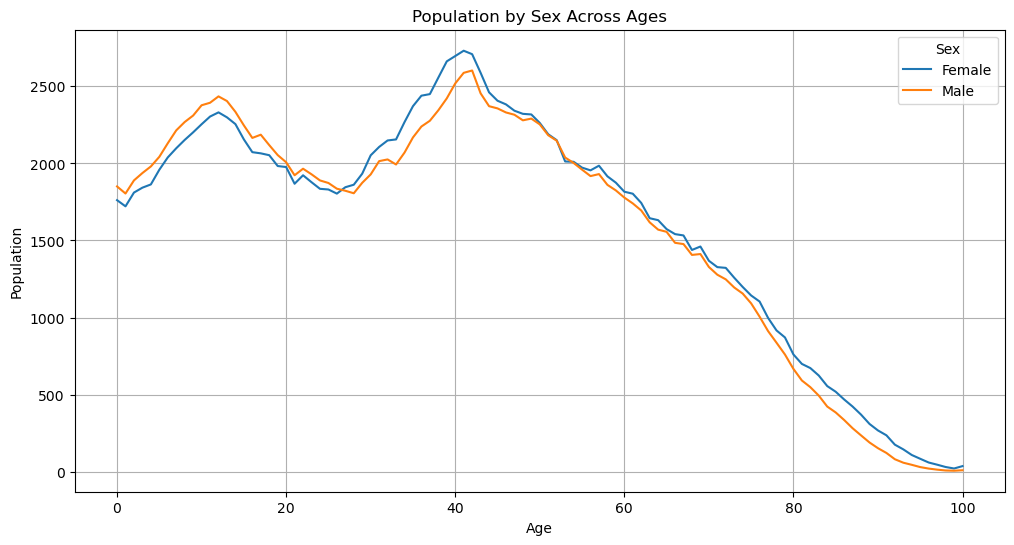

In [9]:
df_analysis.plot(kind="line", figsize=(12,6))

plt.title("Population by Sex Across Ages")
plt.xlabel("Age")
plt.ylabel("Population")
plt.grid(True)
plt.show()


In [10]:
df_analysis.to_csv("population_by_age_for_analysis.csv") # Write pivot table to CSV file

In [11]:
headers = list(df_analysis.columns) # Get list of column headers from pivot table
female = headers[0]
#female

In [12]:
headers = list(df_analysis.columns) # Get list of column headers from pivot table
male = headers[1]
#male

In [13]:
# Weighted mean age (women)

w_mean_women = np.average(df_analysis.index, weights=df_analysis[female]) 
#w_mean_women
print(f"Weighted mean age for women: {w_mean_women}") # Display weighted mean age for women

Weighted mean age for women: 38.9397958987787


In [14]:
# Weighted mean age (men)

w_mean_men = np.average(df_analysis.index, weights=df_analysis[male])
#w_mean_men
print(f"Weighted mean age for men: {w_mean_men}") # Display weighted mean age for men

Weighted mean age for men: 37.7394477371039


## Part 2

In the same notebook, make a variable that stores an age (say 35).

Write that code that would group the people within 5 years of that age together, into one age group 

Calculate the population difference between the sexes in that age group.

In [15]:
age = 35 # Specified age for population calculation

In [16]:
df = df.copy() # Create a copy of the DataFrame to avoid SettingWithCopyWarning
df['age_numeric'] = pd.to_numeric(df['Single Year of Age'], errors='coerce') # Ensure 'Single Year of Age' is numeric

In [17]:
lower_age = age - 5 # Calculate lower age bound
upper_age = age + 5 # Calculate upper age bound

In [18]:
age_mask = df['age_numeric'].ge(lower_age) & df['age_numeric'].le(upper_age) # Create mask for age range
group_df = df[age_mask].copy() # Filter DataFrame for specified age range
#group_df

In [19]:
# Aggregate population by sex

population_by_sex = group_df.groupby('Sex', dropna=False)['VALUE'].sum()
population_by_sex;

In [20]:
# Calculate difference (Male - Female)

male_population = population_by_sex.get('Male', 0) # Get male population, default to 0 if not found
female_population = population_by_sex.get('Female', 0) # Get female population, default to 0 if not found
difference = female_population - male_population 
difference

60952

In [21]:
print("Population by sex within this age range:") # Display population by sex
print(population_by_sex)

Population by sex within this age range:
Sex
Female    829012
Male      768060
Name: VALUE, dtype: int64


In [22]:
print(f"Female - Male = {difference}") # Display difference

Female - Male = 60952


## Part 3

In the same notebook, write the code that would work out which region in Ireland has the biggest population difference between the sexes in that age group.

In [23]:
df = df[df["Administrative Counties"] != "Ireland"]
df.head(5)

,CensusYear,Sex,Single Year of Age,Administrative Counties,VALUE,age_numeric
3297,2022,Male,0,Carlow County Council,346,0
3298,2022,Male,0,Dublin City Council,3188,0
3299,2022,Male,0,Dún Laoghaire Rathdown County Council,1269,0
3300,2022,Male,0,Fingal County Council,2059,0
3301,2022,Male,0,South Dublin County Council,1855,0


In [24]:
# Filter ages within range 

df_age_group = df[(df['age_numeric'] >= lower_age) & (df['age_numeric'] <= upper_age)].copy()
df_age_group
    

,CensusYear,Sex,Single Year of Age,Administrative Counties,VALUE,age_numeric
4257,2022,Male,30,Carlow County Council,367,30
4258,2022,Male,30,Dublin City Council,6163,30
4259,2022,Male,30,Dún Laoghaire Rathdown County Council,1511,30
4260,2022,Male,30,Fingal County Council,1888,30
4261,2022,Male,30,South Dublin County Council,1819,30
...,...,...,...,...,...,...
7867,2022,Female,40,Roscommon County Council,556,40
7868,2022,Female,40,Sligo County Council,538,40
7869,2022,Female,40,Cavan County Council,630,40
7870,2022,Female,40,Donegal County Council,1293,40


In [25]:
# Ensure VALUE is numeric
df_age_group['VALUE'] = pd.to_numeric(df_age_group['VALUE'], errors='coerce').fillna(0)

In [26]:
# Pivot (region × sex population)

region_pivot = df_age_group.pivot_table(
    values='VALUE',
    index='Administrative Counties',   # region column
    columns='Sex',                     # Male / Female
    aggfunc='sum',
    fill_value=0
)

In [27]:
region_pivot

Sex,Female,Male
Administrative Counties,,
Carlow County Council,4774,4451
Cavan County Council,6150,5776
Clare County Council,8896,8085
Cork City Council,19750,18812
Cork County Council,26545,23706
Donegal County Council,11700,10621
Dublin City Council,59831,60867
Dún Laoghaire Rathdown County Council,18450,17074
Fingal County Council,29092,26150


In [28]:
# Compute differences
region_pivot['difference'] = region_pivot.get('Male', 0) - region_pivot.get('Female', 0)
region_pivot['abs_difference'] = region_pivot['difference'].abs()

In [29]:
# Get region with the greatest difference

region_max = region_pivot.sort_values('abs_difference', ascending=False).iloc[0]

In [30]:
print(f"Target age = {age} (range {lower_age}–{upper_age})")
print("\nRegion with largest sex population difference:")
print(region_pivot.sort_values('abs_difference', ascending=False).head(1))

Target age = 35 (range 30–40)

Region with largest sex population difference:
Sex                      Female   Male  difference  abs_difference
Administrative Counties                                           
Fingal County Council     29092  26150       -2942            2942



### End